# Importing the Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')


# Importing the Data

In [5]:
df = pd.read_csv(r'/Users/arqamqureshi/Downloads/AMZN.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-31,72.565002,73.628998,72.501999,72.544502,72.544502,128494000
1,2018-02-01,72.250000,72.994003,69.257004,69.500000,69.500000,182276000
2,2018-02-02,73.869499,74.900002,70.699997,71.497498,71.497498,222514000
3,2018-02-05,70.130997,72.948997,66.036003,69.500000,69.500000,229900000
4,2018-02-06,68.072998,72.199501,67.589500,72.141998,72.141998,221336000


In [6]:
df.shape


(1509, 7)

In [7]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,121.286521,122.754982,119.691939,121.243072,121.243072,8.136936e+07
std,33.056385,33.382792,32.696984,33.008910,33.008910,3.961088e+07
min,67.300003,69.175003,63.296501,66.980003,66.980003,1.762600e+07
25%,91.290497,92.097504,90.349998,91.127502,91.127502,5.477380e+07
50%,116.000000,118.150002,114.029999,115.799500,115.799500,6.966800e+07
75%,155.248505,157.050003,153.263000,154.970001,154.970001,9.675400e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.113460e+08


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1509 non-null   object 
 1   Open       1509 non-null   float64
 2   High       1509 non-null   float64
 3   Low        1509 non-null   float64
 4   Close      1509 non-null   float64
 5   Adj Close  1509 non-null   float64
 6   Volume     1509 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.6+ KB


# Exploratory Data Analysis

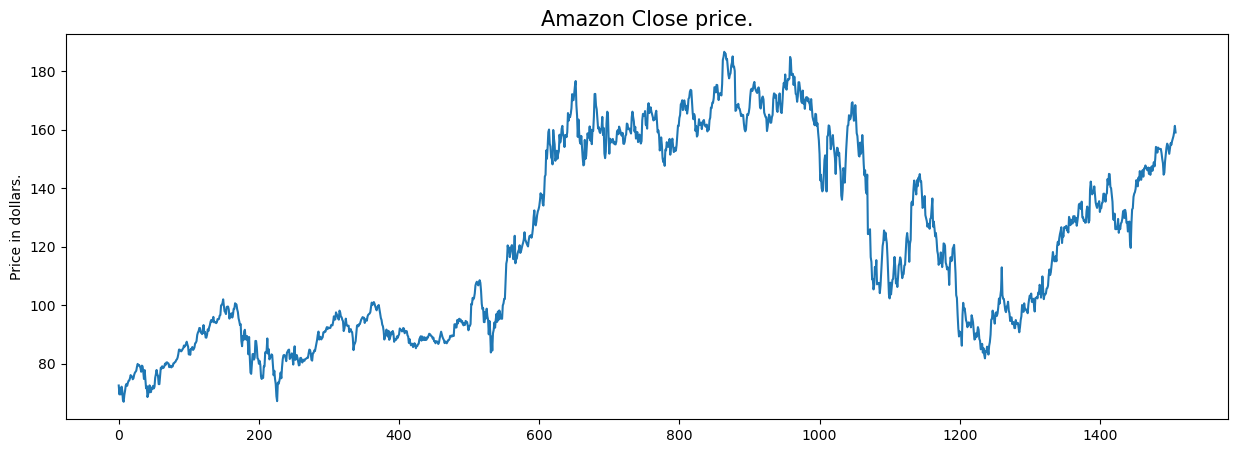

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Amazon Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [10]:
df[df['Close'] == df['Adj Close']].shape


(1509, 7)

In [11]:
df = df.drop(['Adj Close'], axis=1)


In [12]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

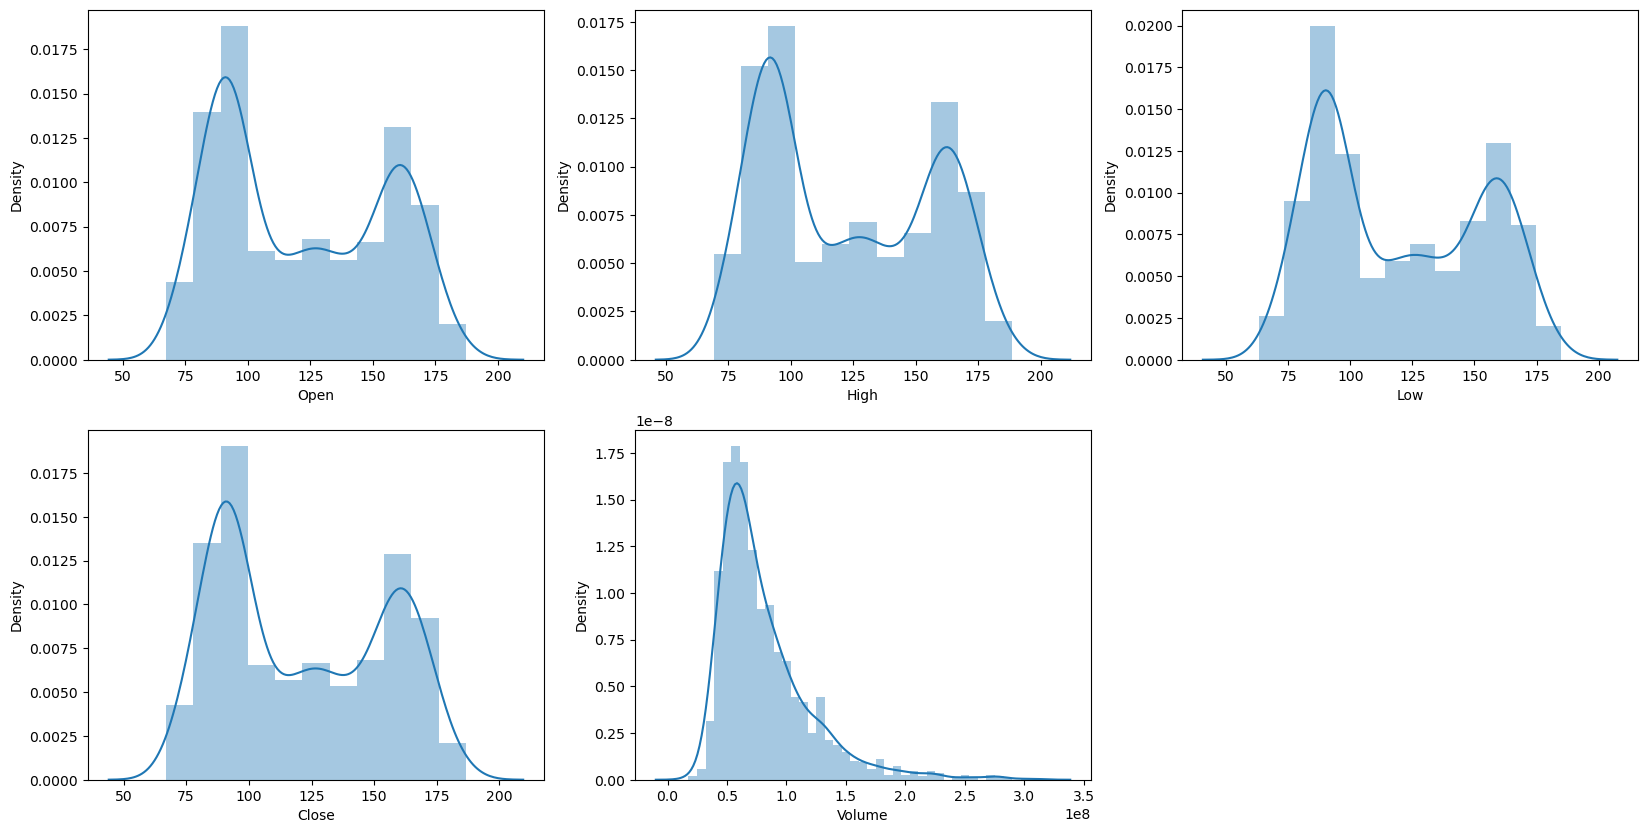

In [13]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()


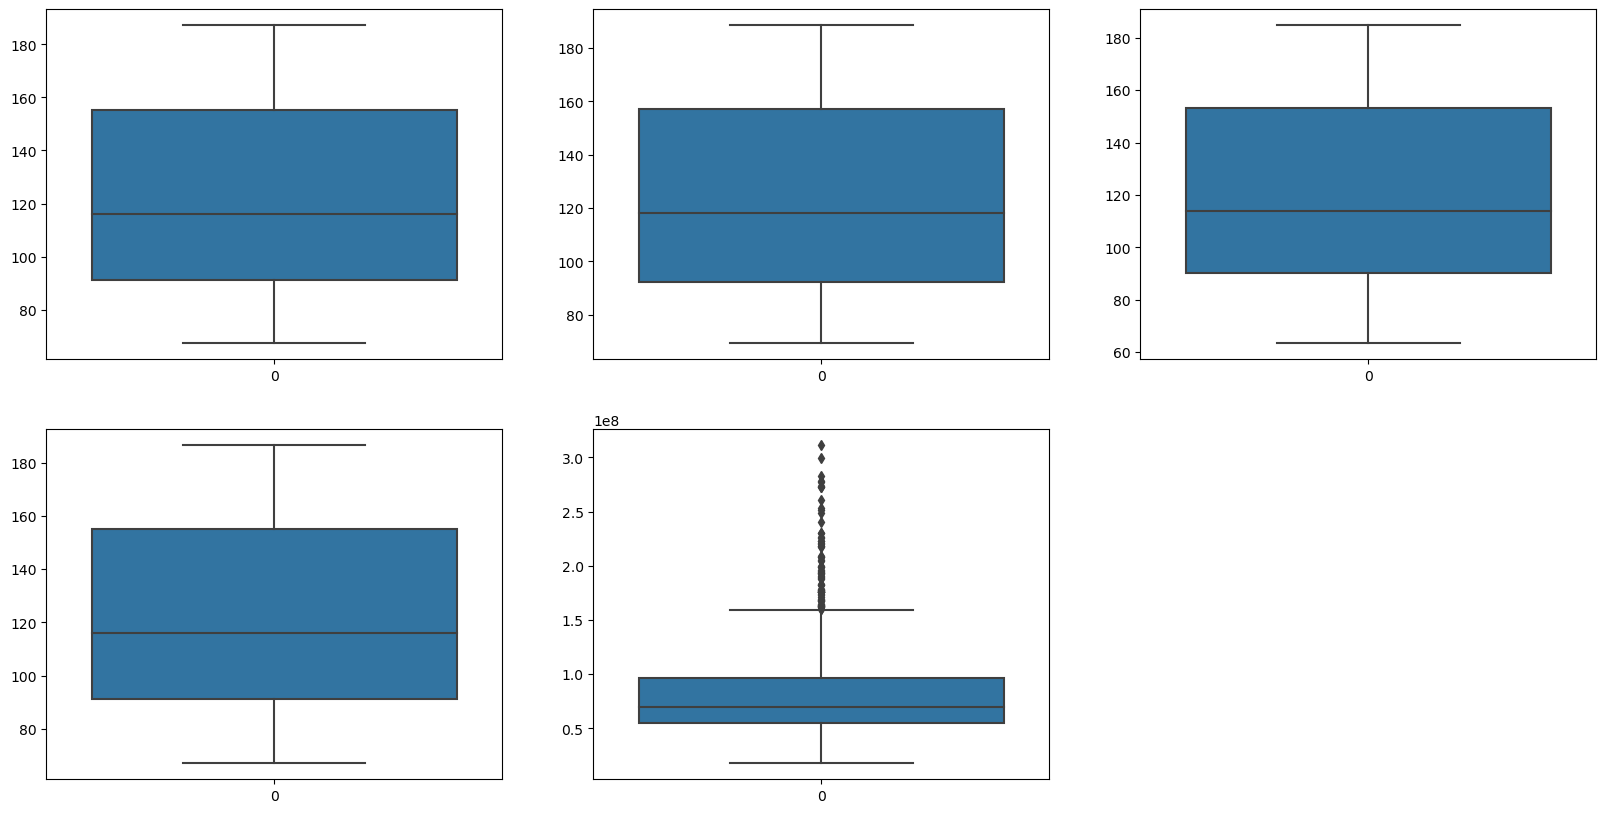

In [14]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()


# Feature Engineering

In [15]:
splitted = df['Date'].str.split('-', expand=True)
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
 
df.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,2018-01-31,72.565002,73.628998,72.501999,72.544502,128494000,31,1,2018
1,2018-02-01,72.250000,72.994003,69.257004,69.500000,182276000,1,2,2018
2,2018-02-02,73.869499,74.900002,70.699997,71.497498,222514000,2,2,2018
3,2018-02-05,70.130997,72.948997,66.036003,69.500000,229900000,5,2,2018
4,2018-02-06,68.072998,72.199501,67.589500,72.141998,221336000,6,2,2018


In [16]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2018-01-31,72.565002,73.628998,72.501999,72.544502,128494000,31,1,2018,0
1,2018-02-01,72.250000,72.994003,69.257004,69.500000,182276000,1,2,2018,0
2,2018-02-02,73.869499,74.900002,70.699997,71.497498,222514000,2,2,2018,0
3,2018-02-05,70.130997,72.948997,66.036003,69.500000,229900000,5,2,2018,0
4,2018-02-06,68.072998,72.199501,67.589500,72.141998,221336000,6,2,2018,0


In [17]:
df_without_date = df.drop('Date', axis=1)


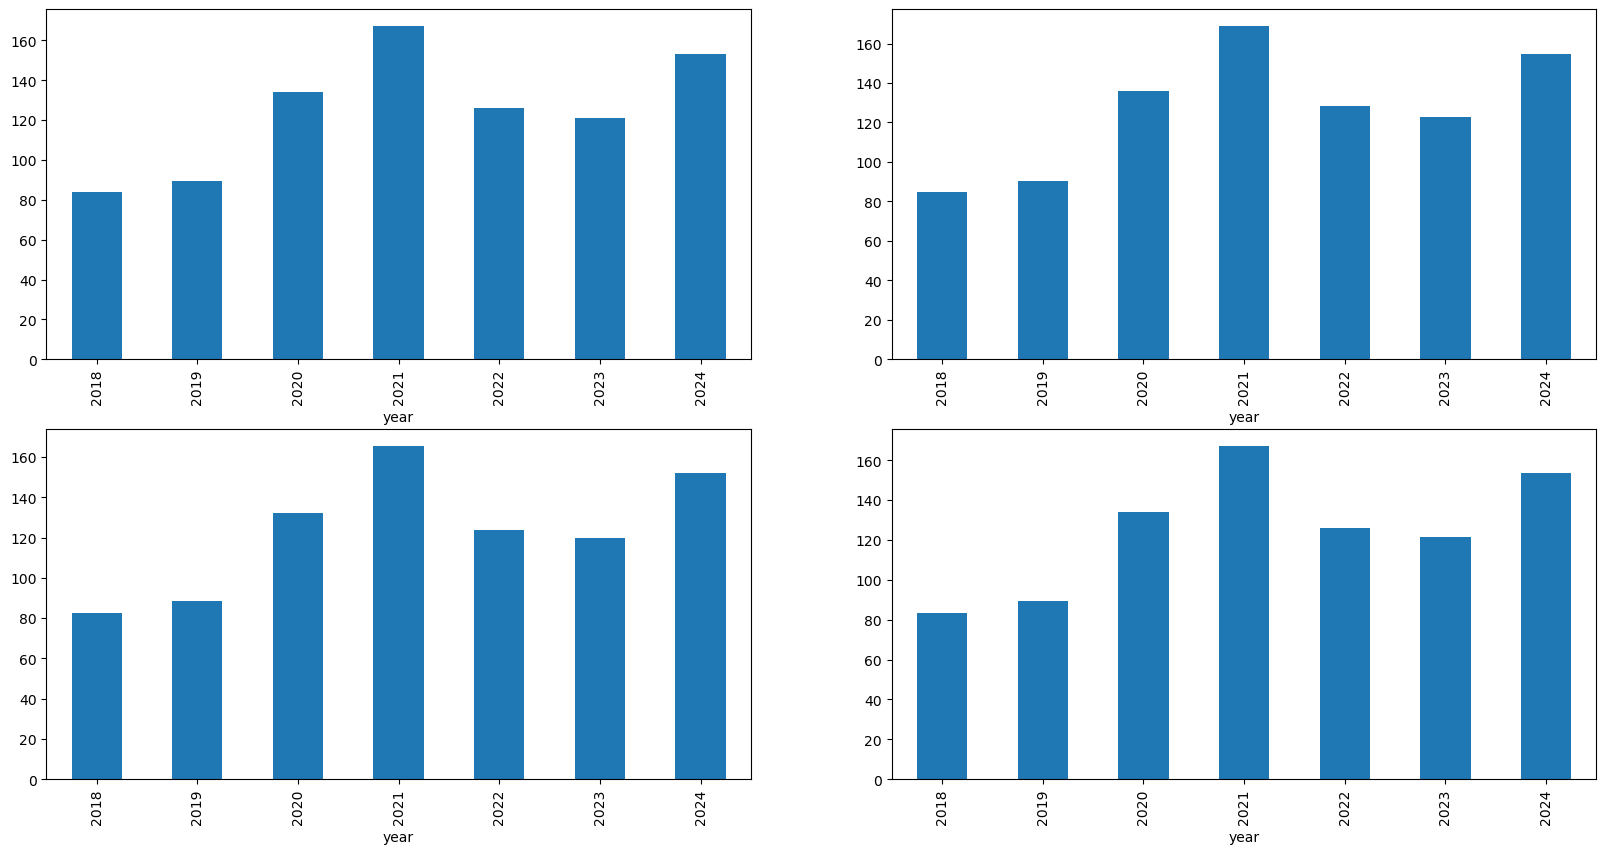

In [18]:
data_grouped = df_without_date.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [19]:
df_without_date.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,121.350790,122.844542,119.769472,121.333440,8.206933e+07,15.712575,6.102794,2020.598802
1,121.159502,122.577983,119.538708,121.064474,7.998600e+07,15.796844,7.414201,2020.532544


In [20]:
df_without_date['open-close'] = df['Open'] - df['Close']
df_without_date['low-high'] = df['Low'] - df['High']
df_without_date['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


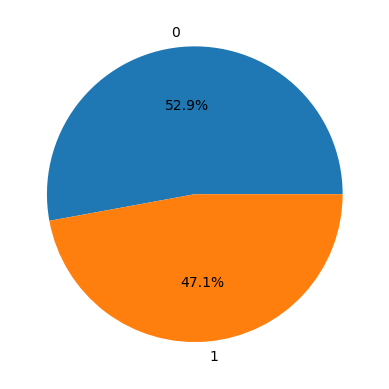

In [22]:
plt.pie(df_without_date['target'].value_counts().values, 
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


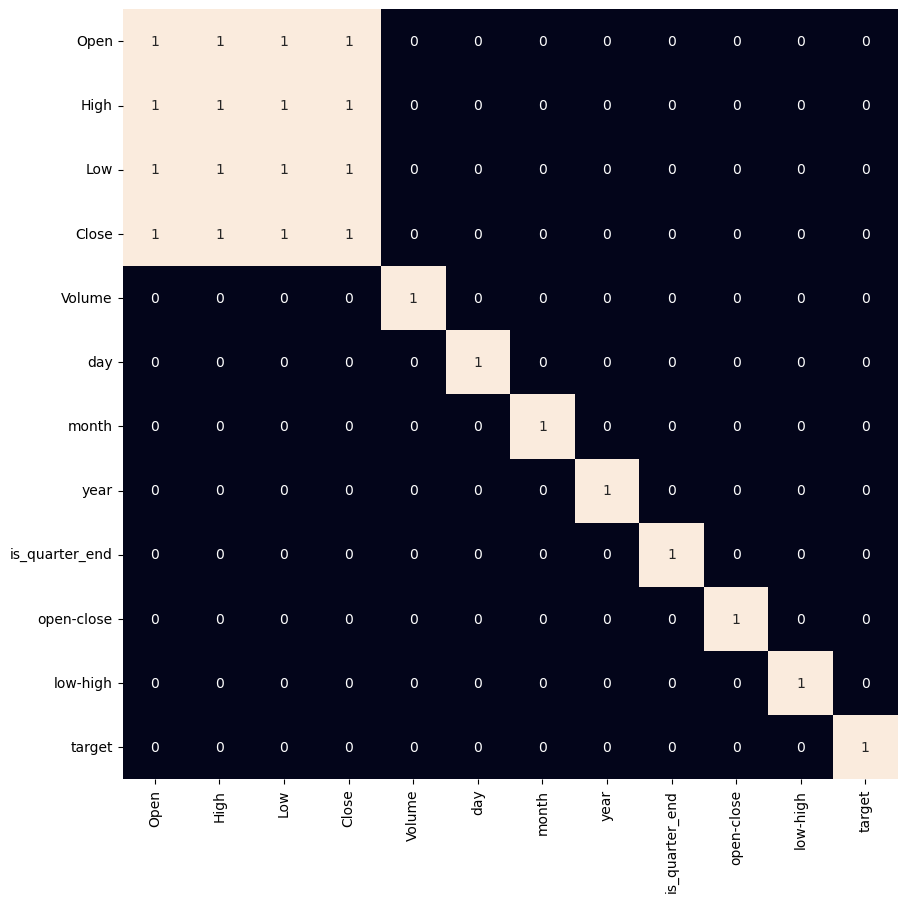

In [23]:
plt.figure(figsize=(10, 10))
sb.heatmap(df_without_date.corr() > 0.9, annot=True, cbar=False)
plt.show()


# Data Splitting and Normalization


In [25]:
features = df_without_date[['open-close', 'low-high', 'is_quarter_end']]
target = df_without_date['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(1358, 3) (151, 3)


In [26]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(
	    Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(
	    Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.5308829945030974
Validation Accuracy :  0.5547484053862509

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5230913532850536
Validation Accuracy :  0.5418143160878809

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

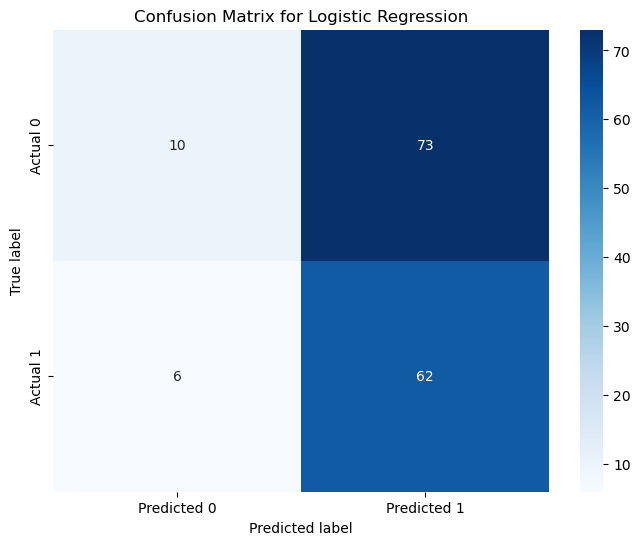

In [27]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, Y_train)

# Make predictions on the validation set
y_pred_logreg = logreg_model.predict(X_valid)

# Create confusion matrix
cm_logreg = confusion_matrix(Y_valid, y_pred_logreg)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()